In [40]:
# general
import math
import pickle
import warnings

import numpy as np

# data manipulation
import pandas as pd

# visualisation
import seaborn as sns

warnings.filterwarnings("ignore")
sns.set_style("whitegrid")
# data processing
import pickle

# autoprot
import sys

import matplotlib.pylab as plt
import plotly.express as px
from matplotlib.lines import Line2D  # for custom legends

sys.path.append(r"\\mandolin\home\jbender\Documents\Python\packages")
from autoprot import analysis as an
from autoprot import preprocessing as pp
from autoprot import visualization as vis

In [79]:
pg = pp.read_csv("data/Pex18-complex_combined/proteinGroups.txt")

# remove Decoy, identified by site and contaminants
pg = pp.cleaning(pg)

# Removes entries without any quantitative data
pg = pp.remove_non_quant(pg, pg.filter(regex="iBAQ").columns)

# Filters for minimal Sequence coverage of 10%%
pg = pp.filter_seq_cov(pg, 10)

# log transform iBAQs
pg = pp.log(pg, pg.filter(regex="iBAQ"), base=10)

pg.head()

3323 rows before filter operation.
3116 rows after filter operation.
3116 rows before filter operation.
3116 rows after filter operation.
3116 rows before filter operation.
2366 rows after filter operation.


,Protein IDs,Majority protein IDs,Peptide counts (all),Peptide counts (razor+unique),Peptide counts (unique),Protein names,Gene names,Fasta headers,Number of proteins,Peptides,...,log10_iBAQ WT_S2_R3_10,log10_iBAQ WT_S2_R3_11,log10_iBAQ WT_S2_R3_2,log10_iBAQ WT_S2_R3_3,log10_iBAQ WT_S2_R3_4,log10_iBAQ WT_S2_R3_5,log10_iBAQ WT_S2_R3_6,log10_iBAQ WT_S2_R3_7,log10_iBAQ WT_S2_R3_8,log10_iBAQ WT_S2_R3_9
0,A5Z2X5,A5Z2X5,3,3,3,UPF0495 protein YPR010C-A,YPR010C-A,sp|A5Z2X5|YP010_YEAST UPF0495 protein YPR010C-...,1,3,...,NaN,NaN,NaN,6.356523,NaN,NaN,NaN,NaN,NaN,NaN
95,O13297,O13297,14,14,14,mRNA-capping enzyme subunit beta,CET1,sp|O13297|CET1_YEAST mRNA-capping enzyme subun...,1,14,...,NaN,NaN,NaN,NaN,NaN,NaN,4.835437,NaN,NaN,6.250469
96,O13516,O13516,26,2,2,40S ribosomal protein S9-A,RPS9A,sp|O13516|RS9A_YEAST 40S ribosomal protein S9-...,1,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,O13525,O13525,3,3,3,"Ubiquinone biosynthesis protein COQ4, mitochon...",COQ4,sp|O13525|COQ4_YEAST Ubiquinone biosynthesis p...,1,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,O13535;Q12088;Q03619;Q99337;Q12217;Q04706;P0CX...,O13535;Q12088;Q03619;Q99337;Q12217;Q04706;P0CX...,25;24;24;23;16;16;16;16;16;16;16;16;16;16;15;15,2;2;2;2;1;1;1;1;1;1;1;1;1;1;1;1,0;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,Transposon Ty1-H Gag-Pol polyprotein;Capsid pr...,TY1B-H;TY1B-LR1;TY1B-ER2;TY1B-NL2;TY1A-BR;TY1A...,sp|O13535|YH11B_YEAST Transposon Ty1-H Gag-Pol...,16,25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Define column pairs for comparison

In [80]:
### Soluble Fractions S1
# SC38 (WT) vs SC377 (TPA 1-3)
# list of tuples with corresponding slice numbers
# here Reps 1-3 of the 3 WT reps are compared with reps 1-3 of the 6 TPA reps
AP_cyto_cols = [
    [f"log10_iBAQ WT_S1_R{rep}_{gel_slice}", f"log10_iBAQ TPA_S1_R{rep}_{gel_slice}"]
    for gel_slice in np.arange(1, 12)
    for rep in np.arange(1, 4)
]

AP_cyto_cols

[['log10_iBAQ WT_S1_R1_1', 'log10_iBAQ TPA_S1_R1_1'],
 ['log10_iBAQ WT_S1_R2_1', 'log10_iBAQ TPA_S1_R2_1'],
 ['log10_iBAQ WT_S1_R3_1', 'log10_iBAQ TPA_S1_R3_1'],
 ['log10_iBAQ WT_S1_R1_2', 'log10_iBAQ TPA_S1_R1_2'],
 ['log10_iBAQ WT_S1_R2_2', 'log10_iBAQ TPA_S1_R2_2'],
 ['log10_iBAQ WT_S1_R3_2', 'log10_iBAQ TPA_S1_R3_2'],
 ['log10_iBAQ WT_S1_R1_3', 'log10_iBAQ TPA_S1_R1_3'],
 ['log10_iBAQ WT_S1_R2_3', 'log10_iBAQ TPA_S1_R2_3'],
 ['log10_iBAQ WT_S1_R3_3', 'log10_iBAQ TPA_S1_R3_3'],
 ['log10_iBAQ WT_S1_R1_4', 'log10_iBAQ TPA_S1_R1_4'],
 ['log10_iBAQ WT_S1_R2_4', 'log10_iBAQ TPA_S1_R2_4'],
 ['log10_iBAQ WT_S1_R3_4', 'log10_iBAQ TPA_S1_R3_4'],
 ['log10_iBAQ WT_S1_R1_5', 'log10_iBAQ TPA_S1_R1_5'],
 ['log10_iBAQ WT_S1_R2_5', 'log10_iBAQ TPA_S1_R2_5'],
 ['log10_iBAQ WT_S1_R3_5', 'log10_iBAQ TPA_S1_R3_5'],
 ['log10_iBAQ WT_S1_R1_6', 'log10_iBAQ TPA_S1_R1_6'],
 ['log10_iBAQ WT_S1_R2_6', 'log10_iBAQ TPA_S1_R2_6'],
 ['log10_iBAQ WT_S1_R3_6', 'log10_iBAQ TPA_S1_R3_6'],
 ['log10_iBAQ WT_S1_R1_7', '

## Median Normalisation as in Till's Thesis

The original approach was to calculate the differences in median between pairs of slices and normalise by the factors.

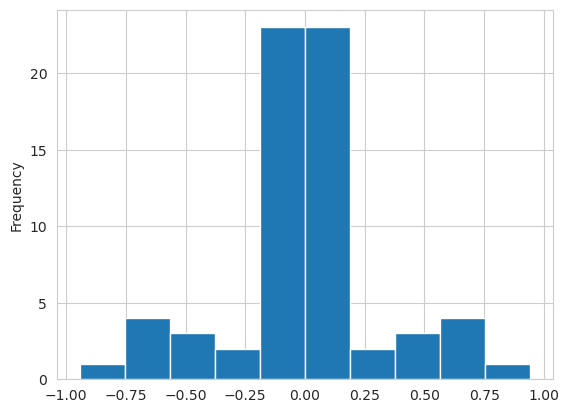

In [81]:
median_iBAQ_srs = pg.filter(
    regex="log10_iBAQ TPA_S1_R[1-3]|log10_iBAQ WT_S1_R[1-3]"
).median(axis=0)

for pair in AP_cyto_cols:
    # get the two median values
    v1, v2 = median_iBAQ_srs[pair]
    # calculate the mean of the medians
    mean_median = np.mean((v1, v2))
    # calculate the difference between each median and the mean (should be symmetric)
    median_iBAQ_srs[pair[0]] = v1 - mean_median
    median_iBAQ_srs[pair[1]] = v2 - mean_median

# check that differences are small and symmetric
median_iBAQ_srs.plot(kind="hist")
plt.savefig("01a_median_histplot.png")
plt.show()

In [82]:
uncorrected_cols = pg.filter(
    regex="log10_iBAQ TPA_S1_R[1-3]|log10_iBAQ WT_S1_R[1-3]"
).columns
corrected_cols = [x + "_median_corrected" for x in uncorrected_cols]

pg[corrected_cols] = pg[uncorrected_cols].subtract(median_iBAQ_srs, axis=1)

pg[corrected_cols]

,log10_iBAQ TPA_S1_R1_1_median_corrected,log10_iBAQ TPA_S1_R1_10_median_corrected,log10_iBAQ TPA_S1_R1_11_median_corrected,log10_iBAQ TPA_S1_R1_2_median_corrected,log10_iBAQ TPA_S1_R1_3_median_corrected,log10_iBAQ TPA_S1_R1_4_median_corrected,log10_iBAQ TPA_S1_R1_5_median_corrected,log10_iBAQ TPA_S1_R1_6_median_corrected,log10_iBAQ TPA_S1_R1_7_median_corrected,log10_iBAQ TPA_S1_R1_8_median_corrected,...,log10_iBAQ WT_S1_R3_10_median_corrected,log10_iBAQ WT_S1_R3_11_median_corrected,log10_iBAQ WT_S1_R3_2_median_corrected,log10_iBAQ WT_S1_R3_3_median_corrected,log10_iBAQ WT_S1_R3_4_median_corrected,log10_iBAQ WT_S1_R3_5_median_corrected,log10_iBAQ WT_S1_R3_6_median_corrected,log10_iBAQ WT_S1_R3_7_median_corrected,log10_iBAQ WT_S1_R3_8_median_corrected,log10_iBAQ WT_S1_R3_9_median_corrected
0,6.188903,NaN,NaN,NaN,6.060525,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,6.633439,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.768301,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3250,NaN,NaN,NaN,5.644481,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3253,NaN,NaN,NaN,NaN,NaN,5.426996,5.738512,5.222931,5.584753,5.655241,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.955378,5.331445
3255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


133117 missing values before and 133117 after correction


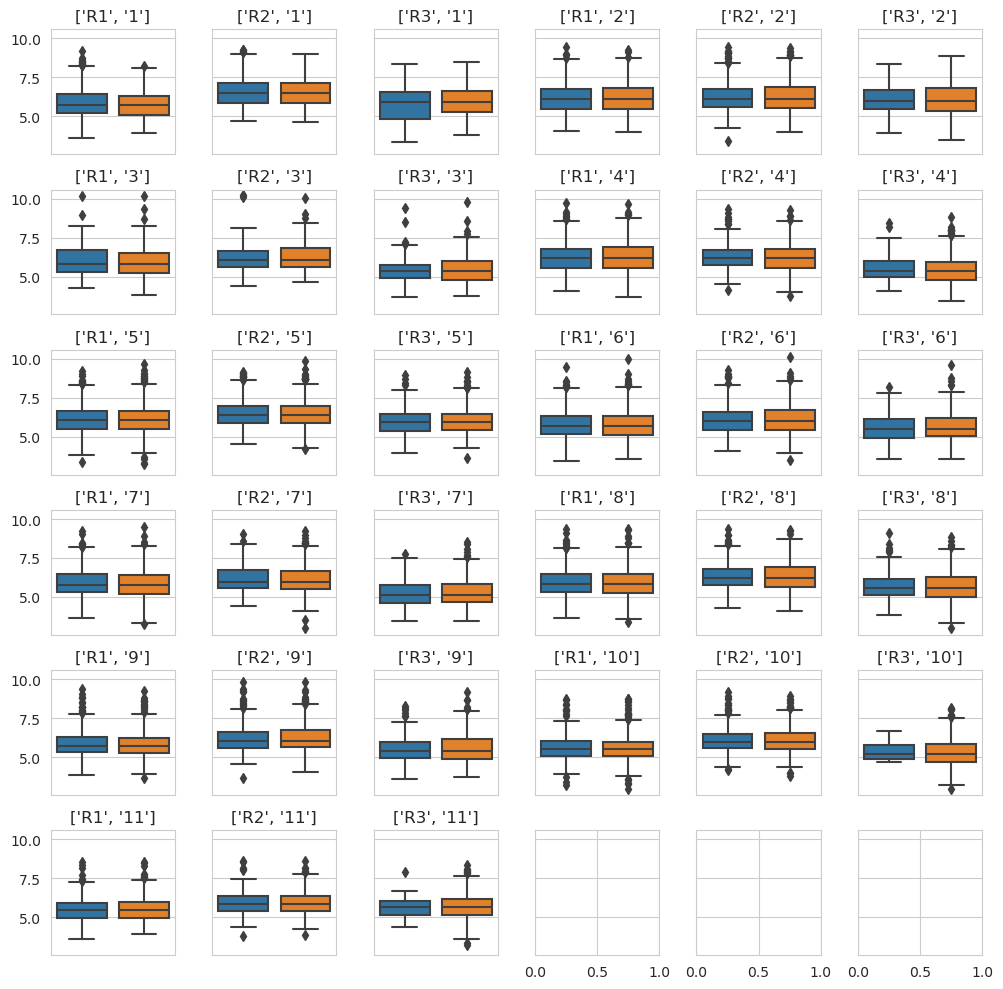

In [83]:
# check that no missing values have been introduced
print(
    f"{pg[uncorrected_cols].isna().sum().sum()} missing values before and {pg[corrected_cols].isna().sum().sum()} after correction"
)

pairs = AP_cyto_cols

fig, axs = plt.subplots(math.ceil(len(pairs) / 6), 6, figsize=(10, 10), sharey="all")
for pair, ax in zip(pairs, axs.flatten()):
    pair = [x + "_median_corrected" for x in pair]
    sns.boxplot(data=pg.loc[:, pair], ax=ax)

    ax.get_xaxis().set_visible(False)
    ax.set_title(pair[0].split(" ")[-1].split("_")[2:-2])

plt.tight_layout()
plt.savefig("01a_median_boxplot_AP_cyto_cols_slices.png")
plt.show()

In [84]:
# extract the lane names from the experiment names
lanes = list(
    set(
        [
            "_".join(x.split(" ")[1].split("_")[:-3])
            for x in pg.filter(regex="log10_iBAQ.*median_corrected").columns
        ]
    )
)

# calculate non-log value for every group of slices and sum
for l in lanes:
    pg["sum_iBAQ " + l + "_median_corrected"] = (
        pg.filter(regex=f"log10_iBAQ {l}_\d+_median_corrected")
        .apply(lambda x: 10**x)
        .sum(axis=1)
        .replace(0, np.nan)
    )

# check that no missing values have been introduced
print(
    "{} missing values before and {} after summation".format(
        pg.filter(regex="log10_iBAQ.*median_corrected").isna().sum().sum(),
        pg.filter(regex=f"sum_iBAQ .*_S\d+_R\d+_median_corrected").isna().sum().sum(),
    )
)

133117 missing values before and 5782 after summation


In [85]:
display(pg.filter(regex="log10_iBAQ.*_corrected").isna().sum(0).sort_values().head())

display(
    pg.filter(regex=f"sum_iBAQ .*_S\d+_R\d+_\w+_corrected").isna().sum(0).sort_values()
)

log10_iBAQ WT_S1_R1_1_median_corrected     1532
log10_iBAQ WT_S1_R1_5_median_corrected     1780
log10_iBAQ TPA_S1_R1_4_median_corrected    1781
log10_iBAQ WT_S1_R1_4_median_corrected     1812
log10_iBAQ TPA_S1_R1_5_median_corrected    1838
dtype: int64

sum_iBAQ WT_S1_R1_median_corrected      699
sum_iBAQ TPA_S1_R3_median_corrected     700
sum_iBAQ TPA_S1_R2_median_corrected     775
sum_iBAQ TPA_S1_R1_median_corrected     858
sum_iBAQ WT_S1_R2_median_corrected     1097
sum_iBAQ WT_S1_R3_median_corrected     1653
dtype: int64

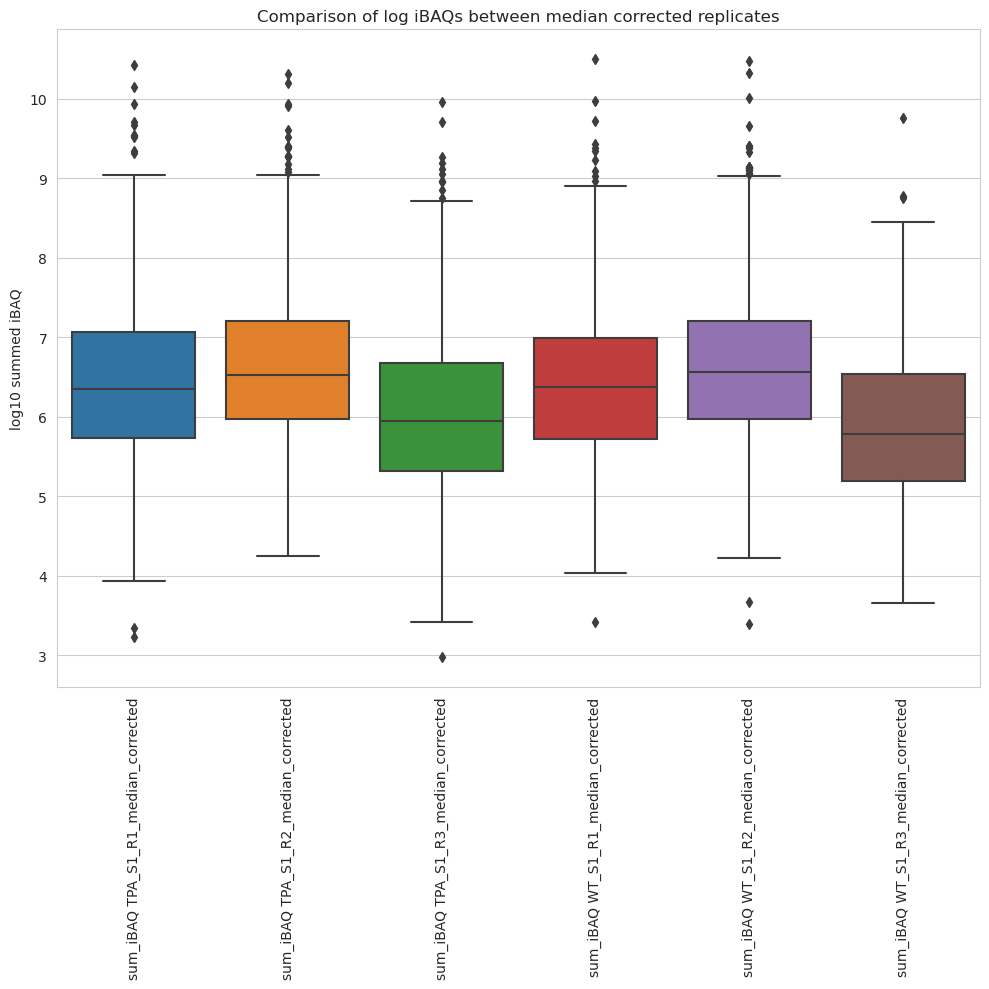

In [86]:
fig, ax = plt.subplots(1, figsize=(10, 10))

sns.boxplot(
    data=np.log10(
        pg.filter(regex=f"sum_iBAQ .*_S\d+_R\d+_median_corrected")
    ).sort_index(axis=1),
    ax=ax,
)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.set_title("Comparison of log iBAQs between median corrected replicates")
ax.set_ylabel("log10 summed iBAQ")
plt.tight_layout()
plt.savefig("01a_median_boxplot_reps.png")
plt.show()

In [87]:
s1_cols = pg.filter(regex="^sum_iBAQ .*_S1_R\d+_\w+_corrected").columns

display(pg.loc[:, s1_cols].isna().sum(0).sort_values().head())

sum_iBAQ WT_S1_R1_median_corrected      699
sum_iBAQ TPA_S1_R3_median_corrected     700
sum_iBAQ TPA_S1_R2_median_corrected     775
sum_iBAQ TPA_S1_R1_median_corrected     858
sum_iBAQ WT_S1_R2_median_corrected     1097
dtype: int64

## VSN across replicates

In [88]:
pg, s1_cols = pp.vsn(
    pg,
    pg.filter(regex="^sum_iBAQ.*S1_R\d+_median_corrected$").columns,
    return_cols=True,
)

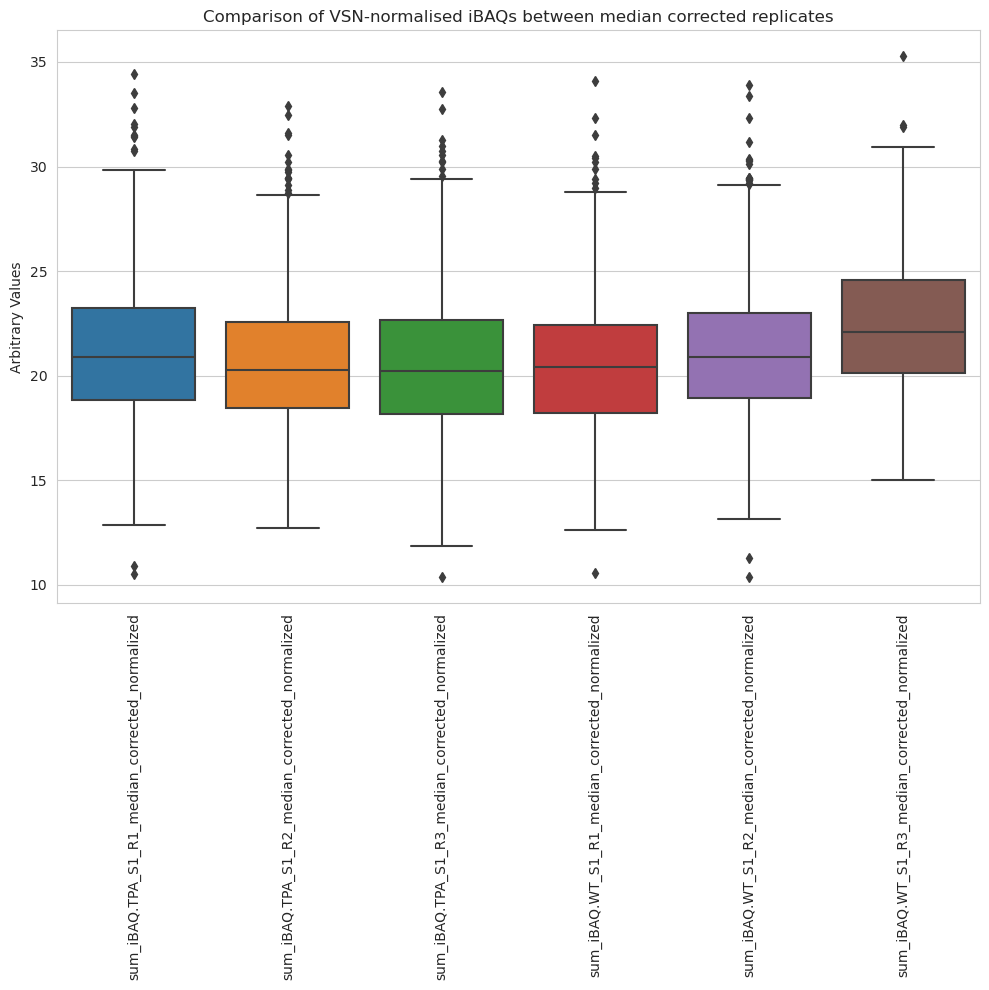

In [89]:
fig, ax = plt.subplots(1, figsize=(10, 10))

sns.boxplot(data=pg.loc[:, s1_cols].sort_index(axis=1), ax=ax)

for tick in ax.get_xticklabels():
    tick.set_rotation(90)

ax.set_title("Comparison of VSN-normalised iBAQs between median corrected replicates")
ax.set_ylabel("Arbitrary Values")
plt.tight_layout()
plt.savefig("01a_median_boxplot_reps_vsn.png")
plt.show()

## Treatment of missing values

Rows have to have at least 2 valid values in each comparison group (i.e. dpex8 3 reps vs TPA 3 reps and TPA 3 reps vs WT)

In [90]:
groups = [
    sorted(s1_cols)[:3],  # TPA R1-R3
]

pg_s1 = pp.filter_vv(pg, groups, n=2)

print("===MVs in S1===")
for g in groups:
    print(f"{pg_s1.loc[:,g].isna().sum().sum()} missing values in s1 columns")

2366 rows before filter operation.
1622 rows after filter operation.
===MVs in S1===
408 missing values in s1 columns


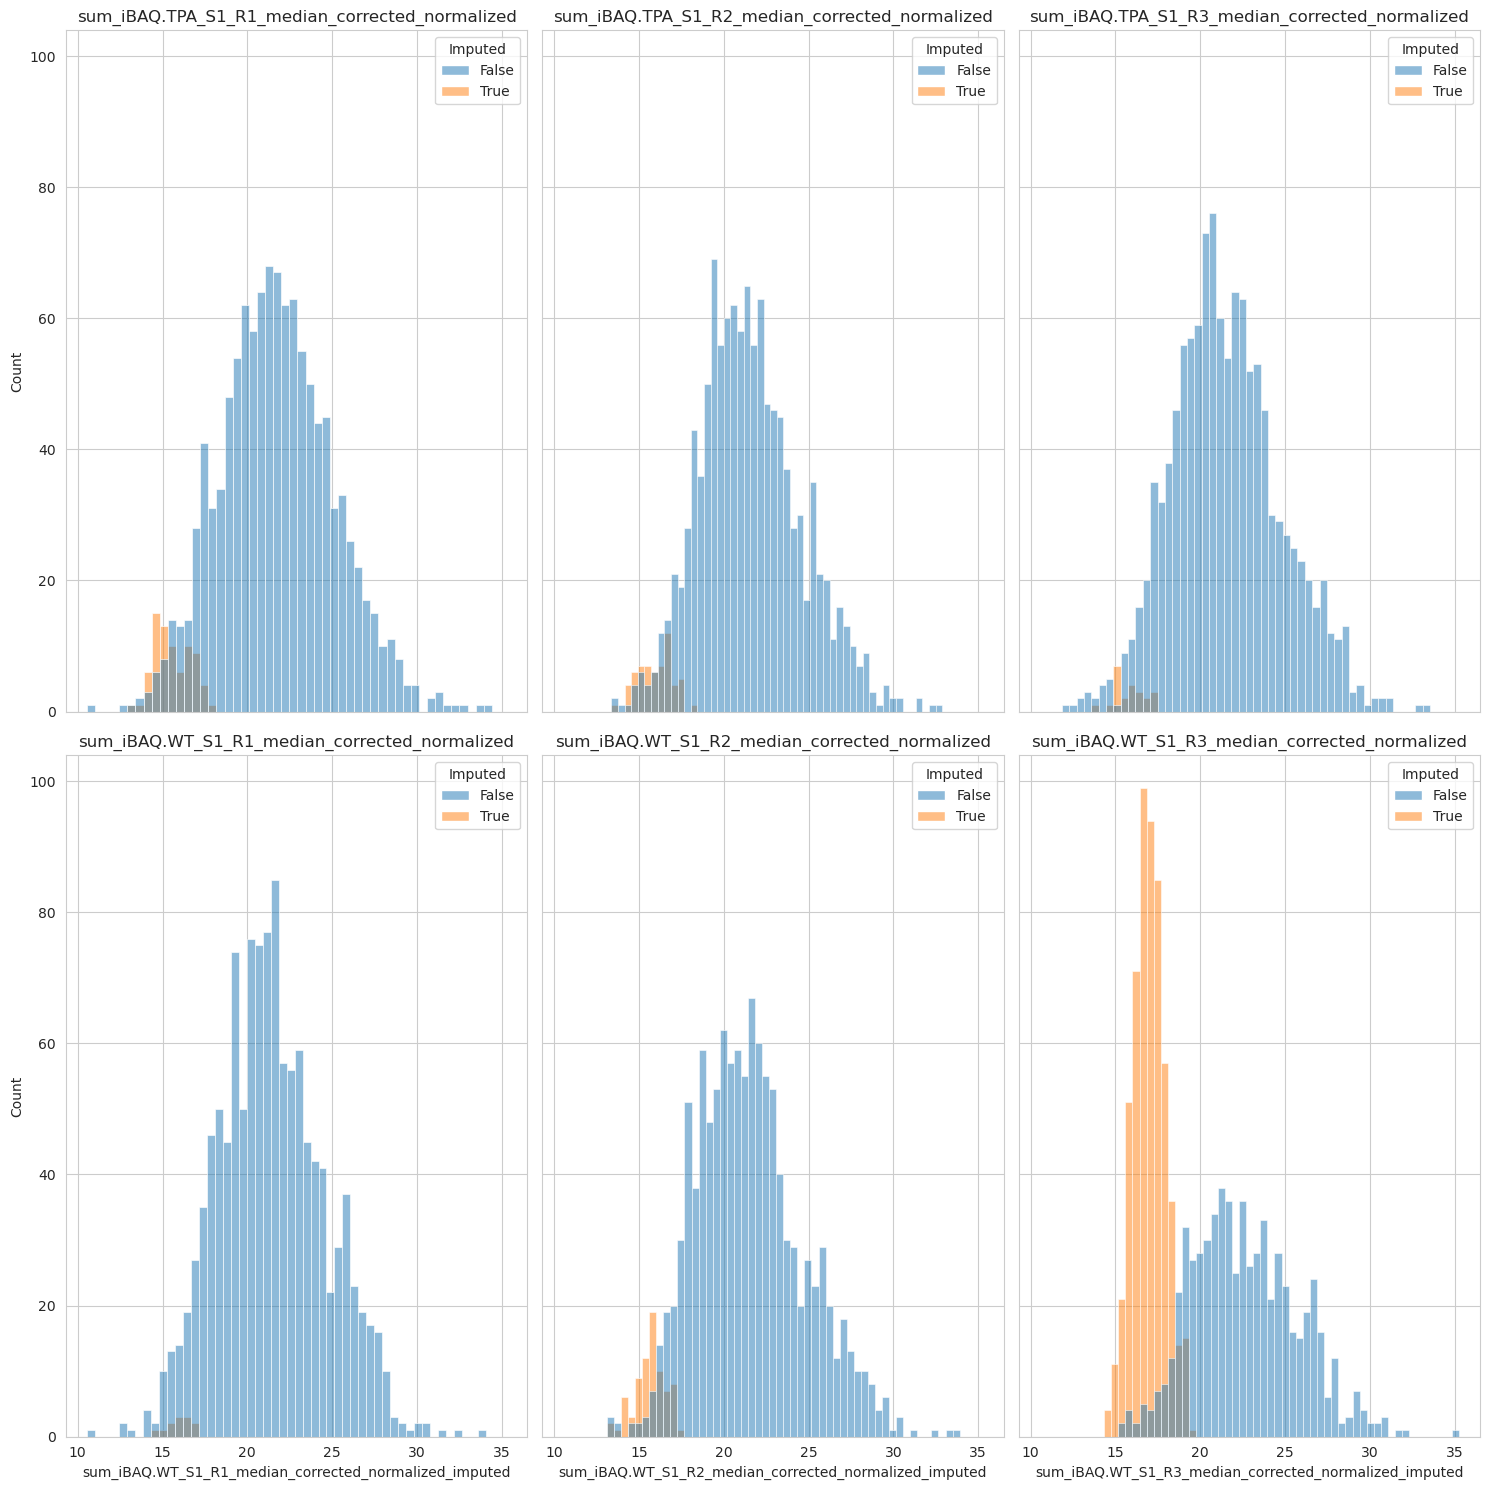

In [78]:
fig, ax = plt.subplots(
    math.ceil(len(s1_cols) / 3), 3, figsize=(15, 15), sharey="all", sharex="all"
)

# perform imputation separately on the dataframes for soluble s1 and membrane s2 proteins
for idx, colname in enumerate(sorted(s1_cols)):
    imp_df = pp.imp_min_prob(pg_s1, cols_to_impute=[colname], max_missing=1)

    # histogram of imputed values
    sns.histplot(
        x=colname + "_imputed",
        data=imp_df,
        hue="Imputed",
        ax=ax[idx // 3, idx % 3],
        bins=50,
    )

    ax[idx // 3, idx % 3].set_title(colname)

    pg_s1[colname + "_imputed"] = imp_df[colname + "_imputed"]

plt.tight_layout()
plt.savefig("01a_median_min_prob_imp.png")
plt.show()

for colname in s2_cols:
    pg_s2[colname + "_imputed"] = pp.impMinProb(
        pg_s2, colsToImpute=[colname], maxMissing=1
    )[colname + "_imputed"]

In [91]:
# save data sets for next processing steps
import pickle

with open("01a_preprocessing_s1.pkl", "wb") as of:
    pickle.dump(pg_s1, of)

## Quality check between reps


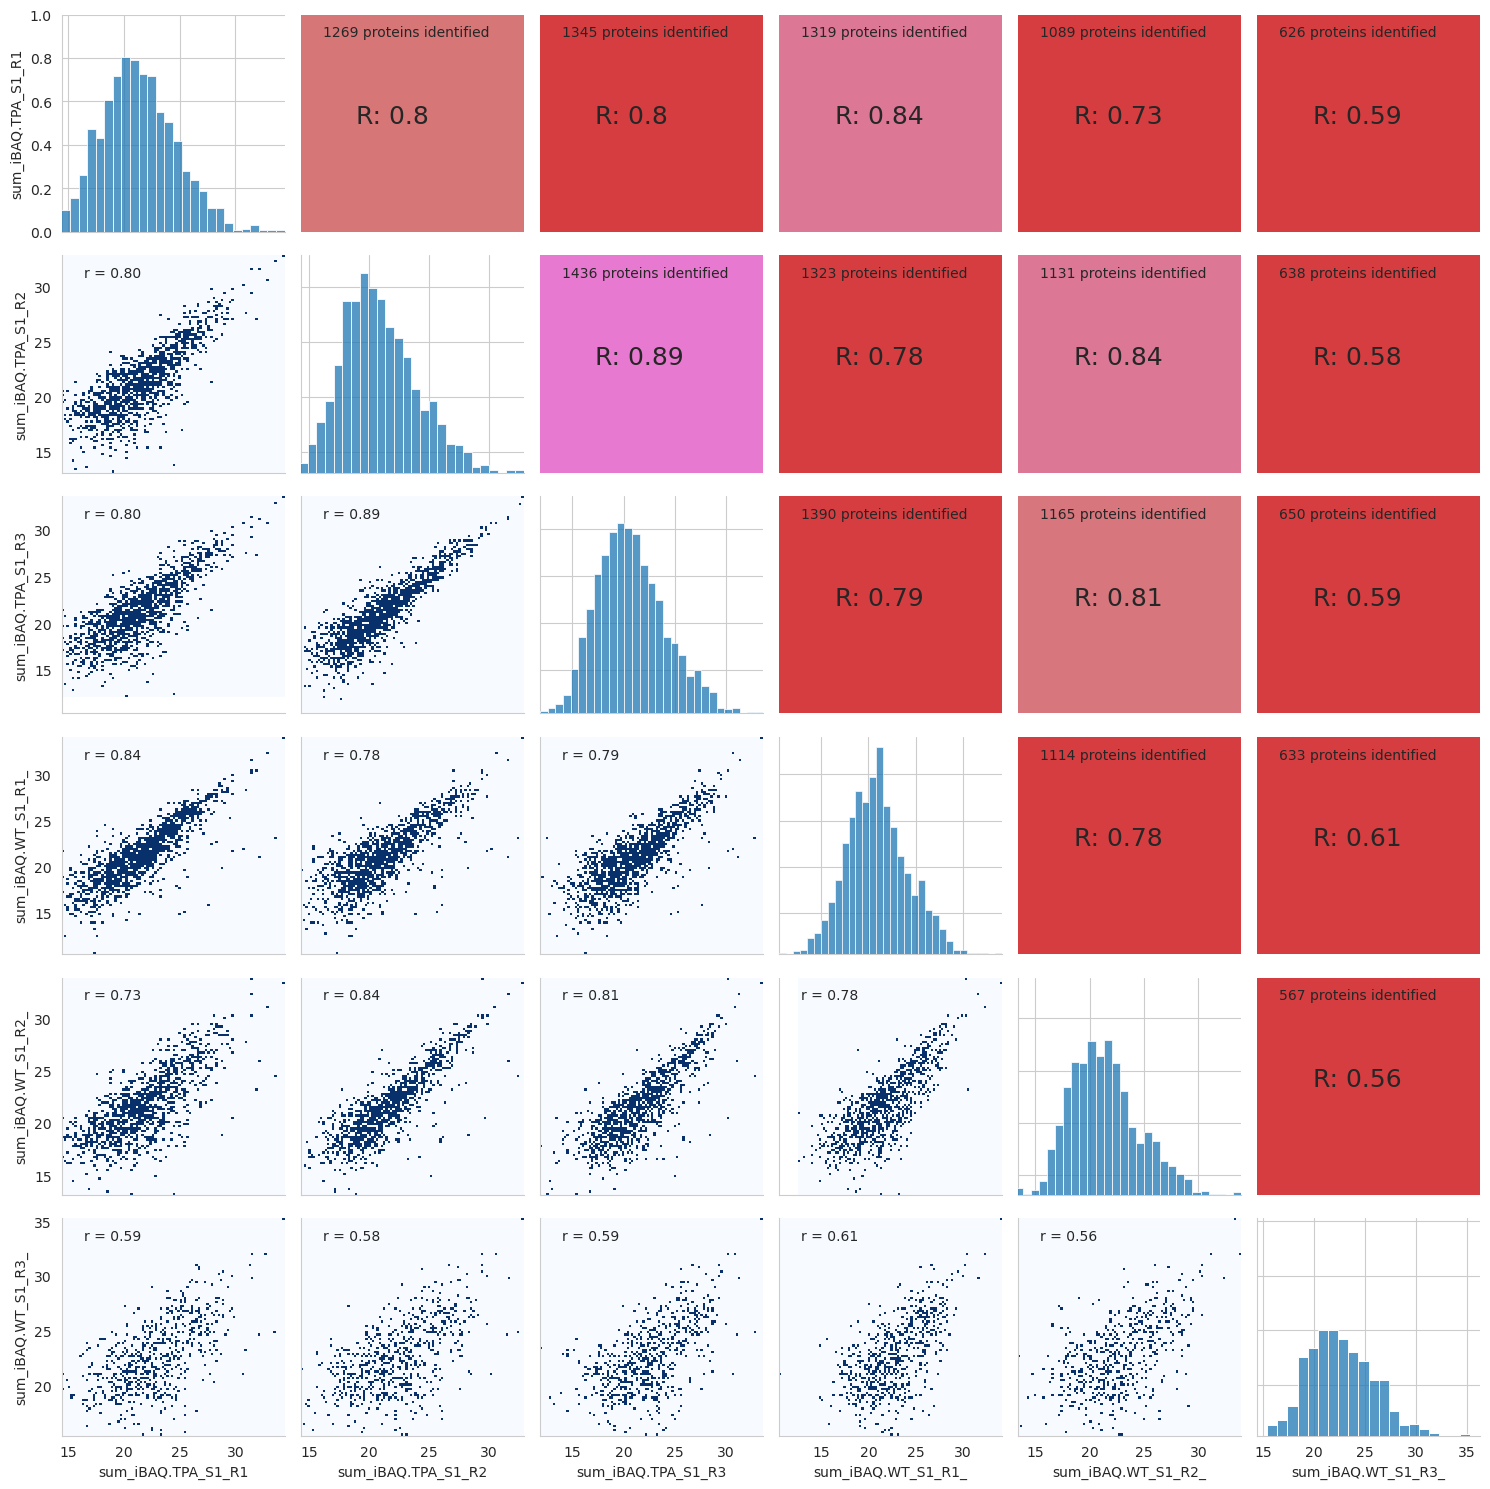

In [96]:
# TPA files
g = vis.correlogram(pg_s1, sorted(s1_cols)[:6], lower_triang="hist2d", ret_fig=True)

# see https://catherineh.github.io/programming/2016/05/24/seaborn-pairgrid-tips
# restrict label length
for c in g.fig.get_children():
    try:
        c.set_xlabel(c.get_xlabel()[:18])
        c.set_ylabel(c.get_ylabel()[:18])
    except:
        pass

plt.tight_layout()
plt.savefig("01a_median_tpa_correlogram.png")